In [2]:
import pandas as pd

chart_data = '...Boston_Fan_Loyalty_Data.xlsx'

celtics = pd.read_excel(chart_data)
bruins = pd.read_excel(chart_data, sheetname=1)
redsox = pd.read_excel(chart_data, sheetname=2)
redsox.head()

,Season,Games,Attendance,Attendance_Average,Seating_Capacity,Percent_Capacity,Win_Percent
0,1960,154,1129866,14674,33368,0.439763,0.422078
1,1961,162,850589,10373,33357,0.310969,0.469136
2,1962,160,733080,9279,33357,0.278172,0.475000
3,1963,161,942642,11783,33357,0.353239,0.472050
4,1964,162,883276,10905,33357,0.326918,0.444444


<IPython.core.display.Javascript object>


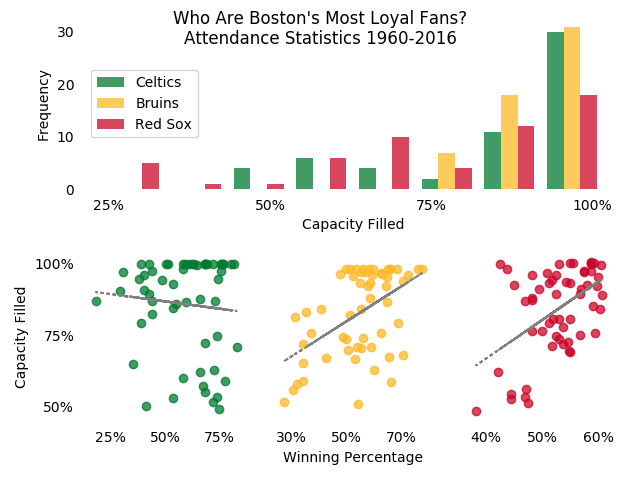

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

%matplotlib notebook

plt.figure()
# Set up plot grid of 2 rows and 3 columns
gspec = gridspec.GridSpec(2, 3)

# Top histogram will take up the first row and all of the columns
top_histogram = plt.subplot(gspec[0, 0:])
# Second row, first column
bottom_left = plt.subplot(gspec[1, 0])
# Second row, second column
bottom_centre = plt.subplot(gspec[1, 1])
# Second row, third column
bottom_right = plt.subplot(gspec[1, 2])

In [4]:
# Define line of best fit function

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

In [5]:
# Isolate data series
c_pc = celtics['Percent_Capacity']
b_pc = bruins['Percent_Capacity']
r_pc = redsox['Percent_Capacity']

c_wp = celtics['Win_Percent']
b_wp = bruins['Win_Percent']
r_wp = redsox['Win_Percent']

# Create top histogram
top_histogram.clear()
top_histogram.hist((c_pc,b_pc,r_pc), bins=8, label = ("Celtics", "Bruins", "Red Sox"), color=['#007a30','#fdb927','#ca0629'], alpha=0.75)
top_histogram.legend(loc=6)
# Limit the number of labels on the x axis
top_histogram.set_xticks((0.25, 0.5,0.75,1.0))
top_histogram.set_xticklabels(('25%', '50%', '75%', '100%'))
# Define axes labels
top_histogram.set_xlabel("Capacity Filled")
top_histogram.set_ylabel("Frequency")
# Turn off chart frame and tick marks
for spine in top_histogram.spines.values():
    spine.set_visible(False)
top_histogram.tick_params(
    axis='both',          
    which='both',      
    bottom='off',      
    left='off')

# Create scatter plots of Celtics, Bruins, and Red Sox

bottom_left.clear()
bottom_left.scatter(c_wp,c_pc, color='#007a30', alpha=0.75)
bottom_left.set_yticks((0.5,0.75,1.0))
bottom_left.set_yticklabels(('50%', '75%', '100%'))
bottom_left.set_xticks((0.25, 0.5,0.75))
bottom_left.set_xticklabels(('25%', '50%', '75%'))
bottom_left.set_ylabel("Capacity Filled")
# Add in line of best fit
# Find y-int and slope
int_c, slope_c = best_fit(c_wp, c_pc)
# Compute points of the line of best fit for each x value
cfit = [int_c + slope_c * xi for xi in c_wp]
bottom_left.plot(c_wp, cfit, color='grey', linestyle=':')
for spine in bottom_left.spines.values():
    spine.set_visible(False)
bottom_left.tick_params(
    axis='both',          
    which='both',      
    bottom='off',      
    left='off')


bottom_centre.clear()
bottom_centre.scatter(b_wp,b_pc, color='#fdb927', alpha=0.75)
bottom_centre.set_xticks((0.30, 0.5, 0.70))
bottom_centre.set_xticklabels(('30%', '50%', '70%'))
bottom_centre.set_xlabel("Winning Percentage")
b_wp_xna = b_wp.dropna()
b_pc_xna = b_pc.dropna()
# Take out NaN value from Bruins lockout season
int_b, slope_b = best_fit(b_wp_xna, b_pc_xna)
bfit = [int_b + slope_b * xi for xi in b_wp_xna]
bottom_centre.plot(b_wp_xna, bfit, color='grey', linestyle=':')
for spine in bottom_centre.spines.values():
    spine.set_visible(False)
bottom_centre.tick_params(
    axis='both',          
    which='both',      
    bottom='off',      
    left='off',
    labelleft='off') 

bottom_right.clear()
bottom_right.scatter(r_wp,r_pc, color='#ca0629', alpha=0.75)
bottom_right.set_xticks((0.4, 0.5, 0.6))
bottom_right.set_xticklabels(('40%', '50%', '60%'))
int_r, slope_r = best_fit(r_wp, r_pc)
rfit = [int_r + slope_r * xi for xi in r_wp]
bottom_right.plot(r_wp, rfit, color='grey', linestyle=':')
for spine in bottom_right.spines.values():
    spine.set_visible(False)
bottom_right.tick_params(
    axis='both',          
    which='both',      
    bottom='off',      
    left='off',
    labelleft='off')

# Title the plot and tighten the layout
plt.suptitle("Who Are Boston's Most Loyal Fans?\nAttendance Statistics 1960-2016")

plt.tight_layout()